Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# DOMAĆI ZADATAK - zadatak 1
## april 2021. 

Ana Zoric 0009/2020


<font color='red'>
Preimenovati svesku u "domaci_zadatak_1_ime_prezime"<br></font>

# __Zadatak__: Sistemi sa pojavom histerezisa
Jedna od diferencijalnih jednačina koja ima veliku primenu u opisivanju određenih dinamičkih sistema u okviru ekonomije i biologije, ima formu:

\begin{equation}
    \frac{dx}{dt} = -x^3 + x + k
\end{equation}

a) Formirati Python definiciju <font color='blue'>zero_finder</font> koja pronalazi sva stacionarna rešenja jednačine u zavisnosti od parametra $k$. Pozivni parametri definicije treba da budu $k$, $x_{min}$ i $x_{max}$, odnosno vrednost parametra $k$ i opseg u kome se traže stacionarna rešenja (donja i gornja granica opsega). Definicija treba da vrati sve vrednosti promenljive $x$ koje predstavljaju stacionarna rešenja u zadatom opsegu za zadatu vrednost parametra $k$. 

Primeniti definiciju na tri slučaja: $k = -3, 0, 3$. Na istom grafiku, linijama različitih boja prikazati fazne dijagrame $dx/dt$ u funkciji od $x$ za opseg od $x_{min}$ do $x_{max}$ za tri zadate vrednosti parametra $k$. Obeležiti ose grafika, grafik nasloviti "fazni dijagram" i prikazati legendu oznaka. Isprekidanom horizontalnom linijom proizvoljne boje označiti osu $dx/dt = 0$. 

Za vrednost k=-3:
-stacionarno resenje za x=-1.68
Za vrednost k=0:
-stacionarno resenje za x=-1.0
-stacionarno resenje za x=-0.0
-stacionarno resenje za x=1.0
Za vrednost k=3:
-stacionarno resenje za x=1.67


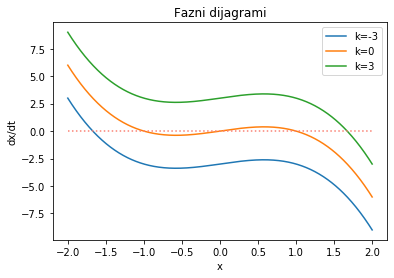

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


fja=lambda x,t,k:-x**3+x+k
def zero_finder(xmin,xmax,k):
    x=np.linspace(xmin,xmax,1000)
    t=np.linspace(0,10,1000)
    znak = np.sign(fja(x,t,k))
    razlika = np.diff(znak)
    nule = np.where(razlika != 0)[0]
    res=list()
    for i in nule: res.append(x[i])
    
    return res

t=np.linspace(0,10,1000)
kniz=[-3,0,3]
x=np.linspace(-2,2,1000)
x0=-2
for i,k in enumerate(kniz):
    #rez=odeint(fja,x0,t,(k,))
    rez=-x**3+x+k
    #plt.plot(x,np.transpose(rez)[0],label="k={}".format(k))
    plt.plot(x,rez,label="k={}".format(k))
    plt.legend()
    
    nule=zero_finder(-2,2,k)
    print("Za vrednost k={}:".format(k))
    for nula in nule: print("-stacionarno resenje za x={}".format(round(nula,2)))
plt.plot(x,[0]*len(x),color="salmon",linestyle="dotted")
plt.title("Fazni dijagrami")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.show()


Komentarisati kako parametar $k$ utiče na broj stacionarnih stanja. 

Sto je vrednost parametra k manja, pre se dostize stacionarno stanje.
Za k=0, diferencijalna jednacina ima 3 stacionarna resenja, jer se svede na dx/dt=-x^3+x, sto je jednako x*(1-x) * (x+1), i jasno je da je dx/dt=0 za slucajeve x=0,x=1 i x=-1.
Za k koje je razlicito od 0:
jednacina x*(1-x) * (x+1) ima lokalni maksimum za x=1/sqrt(3), i on iznosi 2/3/sqrt(3), a lokalni minimum za x=-1/sqrt(3) i on iznosi -2/3/sqrt(3).
apsolutna vrednost ovog minimuma i maksimuma je oko 0,385.
Dakle, za k cija je apsolutna vrednost manja od date, jednacina ce jos uvek imati 3 stacionarna resenja, 
a za k cija je apsolutna vrednost veca od date, jednacina ce imati samo jedno stacionarno resenje.

b) Napraviti Python definiciju <font color='blue'>histerezis</font> koja predstavlja napisanu diferencijalnu jednačinu, a zatim za $k = 0$ odrediti rešenje diferencijalne jednačine $x(t)$ u vremenskom domenu od $0$ do $100$ sekundi u $2000$ ekvidistantnih tačaka. Diferencijalnu jednačinu treba rešiti dva puta, jednom za početni uslov $x(0) = -0.00001$, drugi put za početni uslov $x(0) = 0.00001$. Rešenja prikazati na subplot $1\times 2$ grafiku. Obeležiti ose grafika i nasloviti oba grafika. U naslovima treba da stoji vrednost početnog uslova za koji je grafik dobijen.

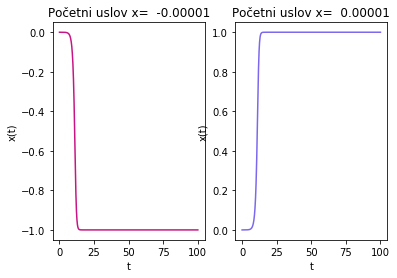

In [2]:
def histerezis(x,t,k):
    return -x**3+x+k

t=np.linspace(0,100,2000)
x02=0.00001
x01=-x02
x=[x01,x02]
k=0
_,axis=plt.subplots(1,2)
for i,xx in enumerate(x):
    rez=odeint(histerezis,xx,t,(k,))
    if xx<0:str="mediumVioletRed"
    else: str="mediumSlateBlue"
    axis[i].plot(t,np.transpose(rez)[0],color=str)
    axis[i].set_title("Početni uslov x=  {:.5f}".format(xx))
    axis[i].set_xlabel("t")
    axis[i].set_ylabel("x(t)")
    
plt.show()

Da li rešenja ulaze u stacionarno stanje? Koliko iznosi stacionarno stanje u jednom, a koliko u drugom slučaju? Da li iz dobijenih rezultata sledi da je stacionarna tačka $x = 0$ privlačnog ili odbojnog karaktera?

Ulaze u stacionarno stanje.
U prvom slucaju kada je x0=-0.00001, stacionarno stanje je za x=-1, a u drugom slucaju je stacionarno stanje za x=1.
Iz dobijenih rezultata vidi se da je tacka x=0 odbojnog karaktera.

c) Umesto ugrađenih metoda, jednačinu rešiti primenom metode konačnih razlika. Ponoviti grafik iz tačke b) primenom ove metode.

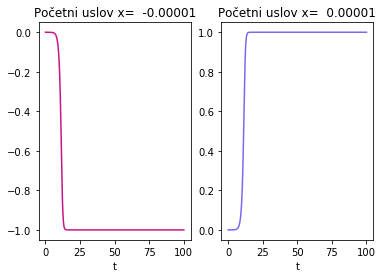

In [15]:
dt=100/2000
_,axis=plt.subplots(1,2)
for i,xx in enumerate(x):
    #rez=odeint(histerezis,xx,t,(k,))
    rez=np.zeros(2000)
    rez[0]=xx
    for j,tr in enumerate(t):
        if j==0: continue
        rez[j]=rez[j-1]+dt*histerezis(rez[j-1],tr,k)
    if xx<0:str="mediumVioletRed"
    else: str="mediumSlateBlue"
    axis[i].plot(t,rez,color=str)
    axis[i].set_title("Početni uslov x=  {:.5f}".format(xx))
    axis[i].set_xlabel("t")
    
plt.show()

d) Korišćenjem definicije <font color='blue'>histerezis</font> rešavati diferencijalnu jednačinu na vremenskom domenu od $0$ do $100$ sekundi u $2000$ ekvidistantnih tačaka, ali za različite vrednosti parametra $k$. Parametar $k$ varirati u rasponu od $-3$ do $3$ u 200 ekvidistantnih tačaka i za svaku vrednost rešiti diferencijalnu jednačinu za dva početna uslova, prvi put za $x(0) = -4$, drugi put za početni uslov $x(0) = 4$. U vektor <font color='blue'>x1</font> u svakoj iteraciji (za svaku vrednost parametra $k$) smeštati stacionarnu vrednost rešenja diferencijalne jednačine dobijenu za prvi početni uslov, a u vektor <font color='blue'>x2</font> smeštati stacionarnu vrednost rešenja diferencijalne jednačine dobijenu za drugi početni uslov. Za stacionarnu vrednost usvajati vrednost za $x$ u dovoljno dalekom vremenskom trenutku za koji se pretpostavlja da nastupilo stacionarno stanje. Na istom grafiku, različitim bojama nacrtati zavisnosti <font color='blue'>x1(k)</font> (punom linijom) i <font color='blue'>x2(k)</font> (isprekidanom linijom). Obeležiti ose grafika i prikazati legendu oznaka. 

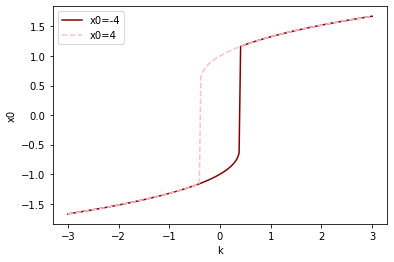

In [23]:
t=np.linspace(0,100,2000)
k=np.linspace(-3,3,200)
x0=[-4,4]
x1=list(); x2=list()
for i,kk in enumerate(k):
    for j,xx in enumerate(x0):
        rez=odeint(histerezis,xx,t,(kk,))
        if j==0: x1.append(rez[1900])
        else: x2.append(rez[1900])
plt.plot(k,x1,color="maroon",linestyle='-',label="x0=-4")
plt.plot(k,x2,color="pink",linestyle="--",label="x0=4")
plt.xlabel("k")
plt.ylabel("x0")
plt.legend()
plt.show()

Pomoću faznih dijagrama nacrtanih u tački a) detaljno objasniti dobijenu formu grafika. Objasniti kojom putanjom se dobijeni grafik opisuje u smeru porasta parametra $k$, a kojom putanjom u smeru smanjivanja parametra $k$.

<font color='red'>Uneti komentar/odgovor na pitanje.</font>